### Capstone Project: Using Machine Learning to Reduce Human/Medical costs Associated with Diabetes.

##### Paul Taiwo-Adeyemo, July 2022, BrainStation

##### Notebook #2 - Modelling

### Advanced Modelling

This notebook is a continuation of Notebook #2. In this notebook, the first subset of datset1 (>30/<30 predictor) from Notebook #1 will be modelled using deep learning.

In [34]:
#import the relevant packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [11]:
#load dataset
dataset1_df0 = pd.read_csv('dataset1_part0_cleaned.csv')

In [12]:
#convert the dataset into dummy dataframe to convert the non-numerical columns to numerical columns
dummy_dataset1_df0 = pd.get_dummies(dataset1_df0)

In [13]:
#define X and Y
X = dummy_dataset1_df0.drop('readmitted', axis=1)
Y = dummy_dataset1_df0['readmitted']

#### Keras Sequential Model

In [14]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

In [15]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [16]:
history = model.fit(X, Y, epochs=200, verbose=1)

Epoch 1/200
3181/3181 [==============================] - 2s 637us/step - loss: 0.6646 - binary_accuracy: 0.5963
Epoch 2/200
3181/3181 [==============================] - 2s 656us/step - loss: 0.6482 - binary_accuracy: 0.6232
Epoch 3/200
3181/3181 [==============================] - 2s 634us/step - loss: 0.6465 - binary_accuracy: 0.6257
Epoch 4/200
3181/3181 [==============================] - 2s 627us/step - loss: 0.6446 - binary_accuracy: 0.6290
Epoch 5/200
3181/3181 [==============================] - 2s 635us/step - loss: 0.6430 - binary_accuracy: 0.6307
Epoch 6/200
3181/3181 [==============================] - 2s 636us/step - loss: 0.6416 - binary_accuracy: 0.6315
Epoch 7/200
3181/3181 [==============================] - 2s 636us/step - loss: 0.6408 - binary_accuracy: 0.6321
Epoch 8/200
3181/3181 [==============================] - 2s 640us/step - loss: 0.6400 - binary_accuracy: 0.6335
Epoch 9/200
3181/3181 [==============================] - 2s 665us/step - loss: 0.6395 - binary_accuracy:

In [17]:
# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X,Y, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}") 

# Generate predictions
predictions = model.predict(X_test)

Train Accuracy: 0.6391
Test Accuracy: 0.6395


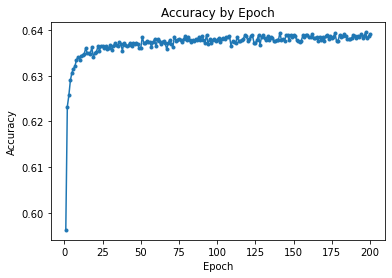

In [18]:
plt.plot(np.arange(200)+1, history.history['binary_accuracy'], marker='.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy by Epoch')
plt.show()

##### The accuracy score of the subset1 of dataset1 did not improve in accuracy with Keras Sequential Model, as the new accuracy score is only 63.9%, slight improvement from 62.8% of the AdaBoost model.
Perharps that dataset itself does not allow for a higher accuracy.

#### This work continues in notebook #4, where a model will be deployed.